In [98]:
# Suppress Warning messages
import warnings
warnings.simplefilter(action='ignore')

In [99]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [100]:
PROBLEM_NAME = 'FourPeaks'
ALGORITHM_NAMES = [
    'RHC',
    'SA',
    'GA',
]

In [101]:
T_PCT = '0.4'

In [102]:
out_dir = f'metrics'
os.makedirs(out_dir, exist_ok=True)

In [103]:
metrics = {}
for algorithm_name in ALGORITHM_NAMES:
    metrics[algorithm_name] = {
        'problem_size': [],
        'fitness_mean': [],
        'fitness_std': [],
        'runtime_mean': [],
        'runtime_std': [],
    }
    df = pd.read_csv(f'metrics_problem_size/{algorithm_name.lower()}_agg.csv')
    df['norm_fitness'] = df['max_fitness'] / df['optimal_fitness']

    for problem_size in sorted(df['problem_size'].unique()):
        temp_df = df[df['problem_size'] == problem_size]
        assert(len(temp_df) == 3)
        metrics[algorithm_name]['problem_size'].append(problem_size)
        metrics[algorithm_name]['fitness_mean'].append(temp_df['norm_fitness'].mean())
        metrics[algorithm_name]['fitness_std'].append(temp_df['norm_fitness'].std())
        metrics[algorithm_name]['runtime_mean'].append(temp_df['total_runtime'].mean())
        metrics[algorithm_name]['runtime_std'].append(temp_df['total_runtime'].std())

In [104]:
def get_color(X):
    if X == 'RHC':
        return 'red', '*', 10, '-'
    elif X == 'SA':
        return 'blue', '>', 6, 'dotted'
    elif X == 'GA':
        return 'green', 'o', 6, 'dashed'
    else:
        raise Exception(f'Unknown X: {X}')

In [105]:
metrics['RHC']['fitness_mean']

[np.float64(1.0),
 np.float64(0.6382978723404256),
 np.float64(0.6329113924050633)]

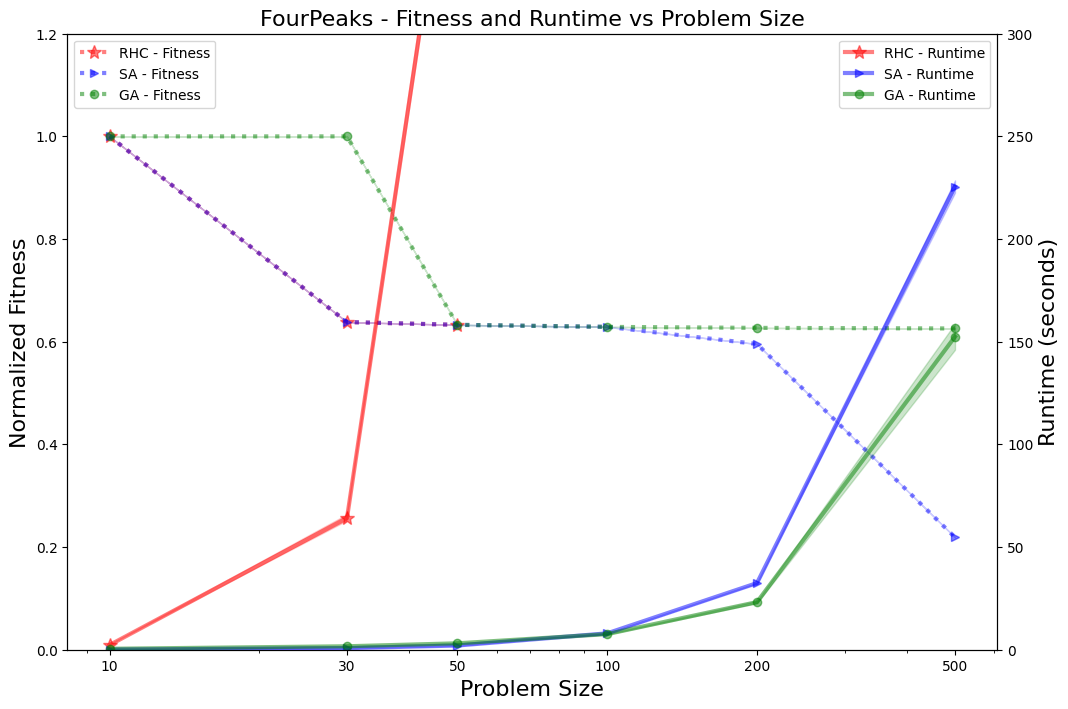

In [109]:
fontsize = 16

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

for algorithm_name in ALGORITHM_NAMES:
    X = metrics[algorithm_name]['problem_size']
    y_fit = metrics[algorithm_name]['fitness_mean']
    y_fit_std = metrics[algorithm_name]['fitness_std']
    y_time = metrics[algorithm_name]['runtime_mean']
    y_time_std = metrics[algorithm_name]['runtime_std']

    color, marker, markersize, linestyle = get_color(algorithm_name)

    ax1.plot(X, y_fit, label=f"{algorithm_name} - Fitness", 
             color=color, linestyle='dotted', marker=marker, lw=3, markersize=markersize, alpha=0.5)
    ax1.fill_between(X, 
                     [y_fit[i] - y_fit_std[i]/4 for i in range(len(y_fit))],
                     [y_fit[i] + y_fit_std[i]/4 for i in range(len(y_fit))], 
                     color=color, alpha=0.2)

    ax2.plot(X, y_time, label=f"{algorithm_name} - Runtime", 
             color=color, linestyle='-', marker=marker, lw=3, markersize=markersize, alpha=0.5)
    ax2.fill_between(X, 
                     [y_time[i] - y_time_std[i]/4 for i in range(len(y_time))],
                     [y_time[i] + y_time_std[i]/4 for i in range(len(y_time))], 
                     color=color, alpha=0.2)

ax1.set_ylabel('Normalized Fitness', fontsize=fontsize)
ax2.set_ylabel('Runtime (seconds)', fontsize=fontsize)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim(0, 1.2)
ax2.set_ylim(0, 300)
ax1.set_xticks(metrics['SA']['problem_size'])
ax1.set_xticklabels(metrics['SA']['problem_size'])

ax1.set_xlabel('Problem Size', fontsize=fontsize)
plt.title(f'{PROBLEM_NAME} - Fitness and Runtime vs Problem Size', fontsize=fontsize)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig(f'{out_dir}/{PROBLEM_NAME}_fitness_and_runtime_vs_problem_size.png')